# Chapter 12: The Gillespie Algorithm: An Exact Simulation of Randomness

# Lab 4: Implementing the Gillespie SSA for mRNA Dynamics


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_ssa_mrna(beta, gamma, m0, t_max, num_trajectories):
    """Simulates mRNA production/degradation using the Gillespie SSA."""
    all_times = []
    all_m_counts = []

    for _ in range(num_trajectories):
        # Initialization for a single trajectory
        t = 0.0
        m = m0
        times = [t]
        m_counts = [m]

        while t < t_max:
            # Propensities
            a1 = beta
            a2 = gamma * m
            a0 = a1 + a2

            if a0 == 0:
                break  # No more reactions can occur

            # Time to next reaction
            r1 = np.random.rand()
            tau = (1 / a0) * np.log(1 / r1)

            # Choose which reaction
            r2 = np.random.rand()
            if r2 * a0 < a1:
                # Production reaction
                m += 1
            else:
                # Degradation reaction
                m -= 1

            # Update and record
            t += tau
            times.append(t)
            m_counts.append(m)

        all_times.append(np.array(times))
        all_m_counts.append(np.array(m_counts))

    return all_times, all_m_counts


In [3]:
# Parameters
beta = 10.0  # Production rate (mRNA/min)
gamma = 0.1  # Degradation rate (1/min)
m0 = 0       # Initial mRNA count
t_max = 200  # Max simulation time (min)
num_trajectories = 500

# Run simulation
times_list, m_counts_list = gillespie_ssa_mrna(beta, gamma, m0, t_max, num_trajectories)


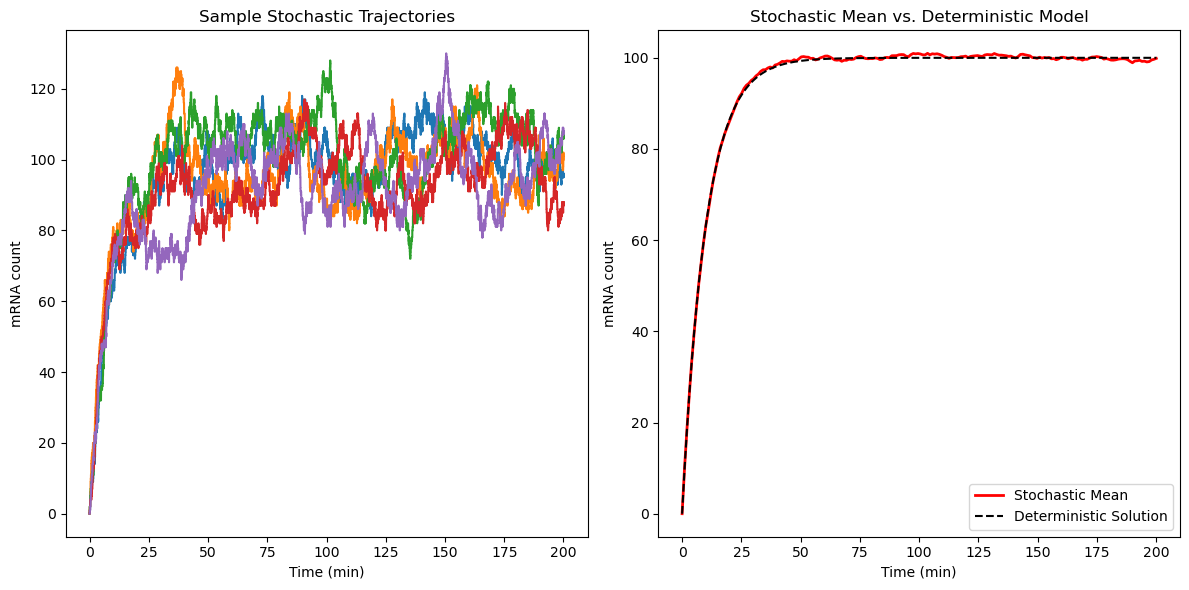

In [4]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot a few sample trajectories
plt.subplot(1, 2, 1)
for i in range(5):
    plt.step(times_list[i], m_counts_list[i], where='post')
plt.xlabel("Time (min)")
plt.ylabel("mRNA count")
plt.title("Sample Stochastic Trajectories")

# Plot the mean and compare to the deterministic solution
plt.subplot(1, 2, 2)
# Create a common time grid for averaging
time_grid = np.linspace(0, t_max, 200)
m_interpolated = np.array([np.interp(time_grid, times, counts) 
                          for times, counts in zip(times_list, m_counts_list)])
mean_m = np.mean(m_interpolated, axis=0)

plt.plot(time_grid, mean_m, 'r-', lw=2, label='Stochastic Mean')

# Deterministic solution: m(t) = (beta/gamma) * (1 - exp(-gamma*t))
deterministic_m = (beta / gamma) * (1 - np.exp(-gamma * time_grid))
plt.plot(time_grid, deterministic_m, 'k--', label='Deterministic Solution')
plt.xlabel("Time (min)")
plt.ylabel("mRNA count")
plt.title("Stochastic Mean vs. Deterministic Model")
plt.legend()

plt.tight_layout()
plt.show()


# waiting time

In [39]:
a0=1
random_time_list=[]
waiting_time_list=[]

for j in range(10000):
    r1 = np.random.rand()
    tau = (1 / a0) * np.log(1 / r1)
    random_time_list.append(r1)
    waiting_time_list.append(tau)


In [40]:
import seaborn as sns

Text(0.5, 0, 'Time')

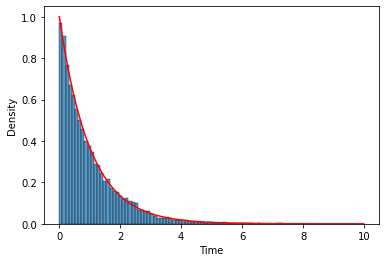

In [41]:
t_range=np.arange(1000)/100

sns.histplot(waiting_time_list,stat='density')
plt.plot(t_range,a0*np.exp(-a0*t_range),'-r')
plt.xlabel('Time')

In [49]:
waiting_time_list

[0.6830886138687566,
 0.48070496716675293,
 0.4400407632691625,
 0.07539100494082361,
 0.005319269517657161,
 1.1669405890214237,
 0.5010704410875283,
 0.6009959906015847,
 0.8718398928581521,
 2.2833613733846767,
 0.5126430244483906,
 0.03507531528019247,
 0.014652575637401166,
 0.020554414445556023,
 0.35935511972987877,
 0.031025153169345177,
 0.534458575583931,
 1.1223213034274284,
 0.2530647885415893,
 1.3501003968962118,
 1.1429389692681082,
 0.56205741642443,
 0.9187723592327924,
 0.34566822004214987,
 1.9273965092343401,
 1.4564288493389286,
 1.7808302155264637,
 0.382768778136916,
 0.007066947512989161,
 0.08527815954646022,
 5.895914022669219,
 1.5493129795327867,
 0.9696204479634996,
 0.48334837730740843,
 2.051756744064785,
 0.06013568829142071,
 3.470088751566328,
 0.11062377127204988,
 2.982483736608941,
 0.5341505470526701,
 0.059209280374052396,
 0.07903244275438015,
 1.6312395886985218,
 1.6758052792715261,
 1.950470861085678,
 1.579068603400735,
 0.8850135205377446,
 

<AxesSubplot:ylabel='Count'>

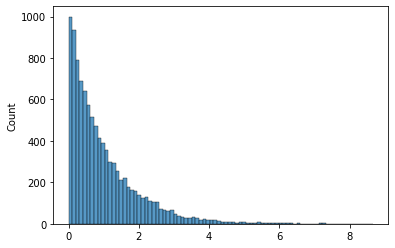

In [50]:
sns.histplot(waiting_time_list)

In [47]:
P_cumulative=[]
for x in waiting_time_list:
    tmo=np.mean(waiting_time_list<=x)
    P_cumulative.append(tmo)

<AxesSubplot:ylabel='Count'>

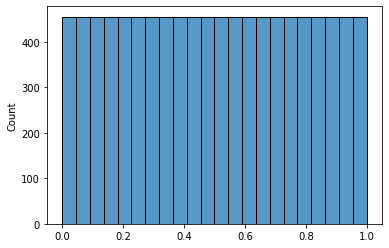

In [48]:
sns.histplot(P_cumulative)

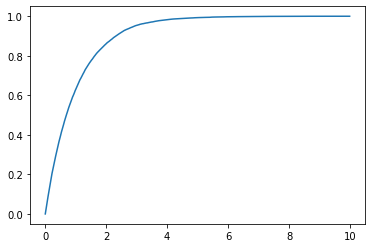

In [45]:
plt.plot(t_range,P_cumulative)